In [2]:
%matplotlib notebook
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Look Pretty
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data=pd.read_excel("motor rpm prediction jun2019.xlsx")
data.columns=['time_gap','in_value','input_value','rpm']
data.head()

,time_gap,in_value,input_value,rpm
0,7,1,1,0.0
1,7,2,2,0.0
2,7,3,3,0.0
3,7,4,4,0.0
4,7,5,5,0.0


In [ ]:
df_abnormal=pd.DataFrame([[30,1000,20],[40,100,40]])
df_abnormal.columns=['time_gap','input_value','rpm']

In [6]:
#X=pd.concat([X,df_abnormal],axis=0)

In [4]:
#data=pd.read_excel('motor rpm prediction trial jun2019.csv',sep=',',header=None)
#data.columns=['time_gap','in_value','input_value','rpm']
#data.head()

<IPython.core.display.Javascript object>


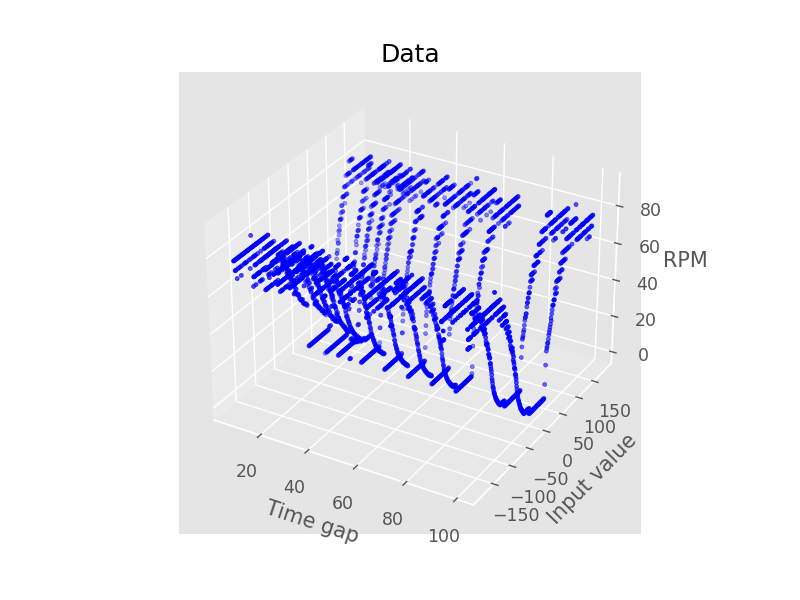

Text(0.5, 0.92, 'Data')

In [8]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Time gap')
ax.set_ylabel('Input value')
ax.set_zlabel('RPM')
ax.scatter(data.time_gap, data.input_value, data.rpm, c='b', marker='.')
plt.title('Data')

In [9]:
X=data[['input_value','rpm','time_gap']]

In [10]:
from sklearn.cluster import AffinityPropagation,Birch,DBSCAN

C:\Users\avdho\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


<IPython.core.display.Javascript object>


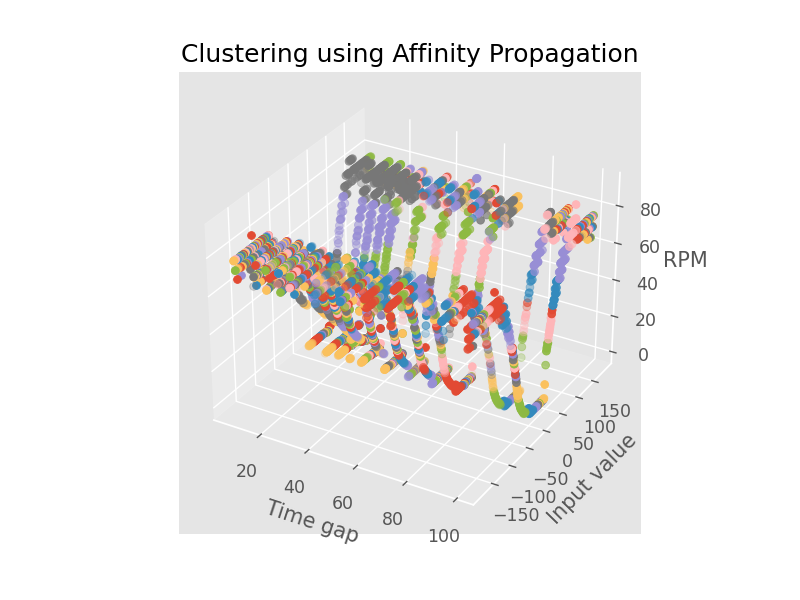

Text(0.5, 0.92, 'Clustering using Affinity Propagation')

In [14]:
model=AffinityPropagation()
model.fit(X)
y_pred=model.predict(X)

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Time gap')
ax.set_ylabel('Input value')
ax.set_zlabel('RPM')
clusters = np.unique(y_pred)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(y_pred == cluster)
    # create scatter of these samples

    ax.scatter(X.time_gap.iloc[row_ix], X.input_value.iloc[row_ix], X.rpm.iloc[row_ix])
    #plt.scatter(X['rpm'].iloc[row_ix], X['input_value'].iloc[row_ix])
# show the plot
plt.show()
plt.title('Clustering using Affinity Propagation')

In [123]:
row_ix

(array([3565, 3566, 3567, 3568, 3569, 3570, 3923, 3924, 3925, 3926, 3927,
        3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937],
       dtype=int64),)

In [17]:
model = Birch(threshold=0.1, n_clusters=2)
model.fit(X)
y_pred=model.predict(X)

<IPython.core.display.Javascript object>


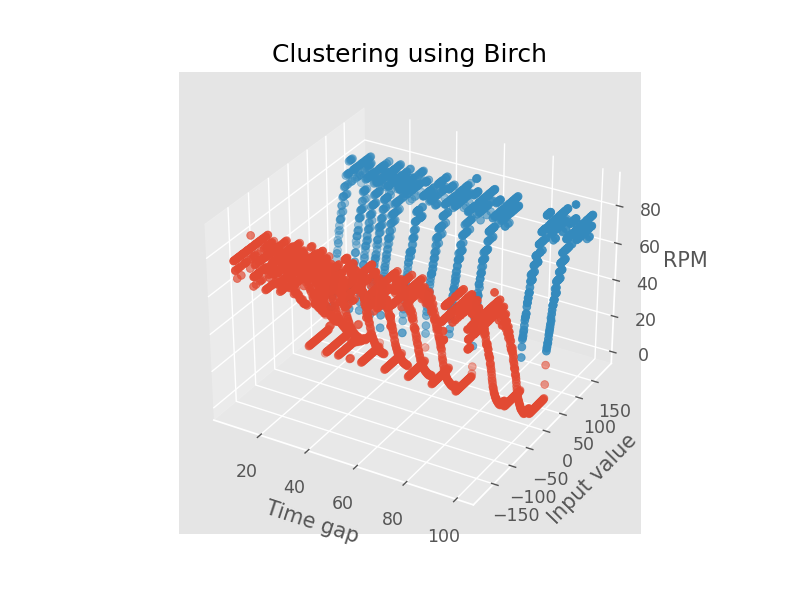

Text(0.5, 0.92, 'Clustering using Birch')

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Time gap')
ax.set_ylabel('Input value')
ax.set_zlabel('RPM')
clusters = np.unique(y_pred)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(y_pred == cluster)
    # create scatter of these samples
    
    ax.scatter(X.time_gap.iloc[row_ix], X.input_value.iloc[row_ix], X.rpm.iloc[row_ix])
    #plt.scatter( X['input_value'].iloc[row_ix],X['rpm'].iloc[row_ix])
# show the plot
plt.show()
plt.title('Clustering using Birch')

<IPython.core.display.Javascript object>


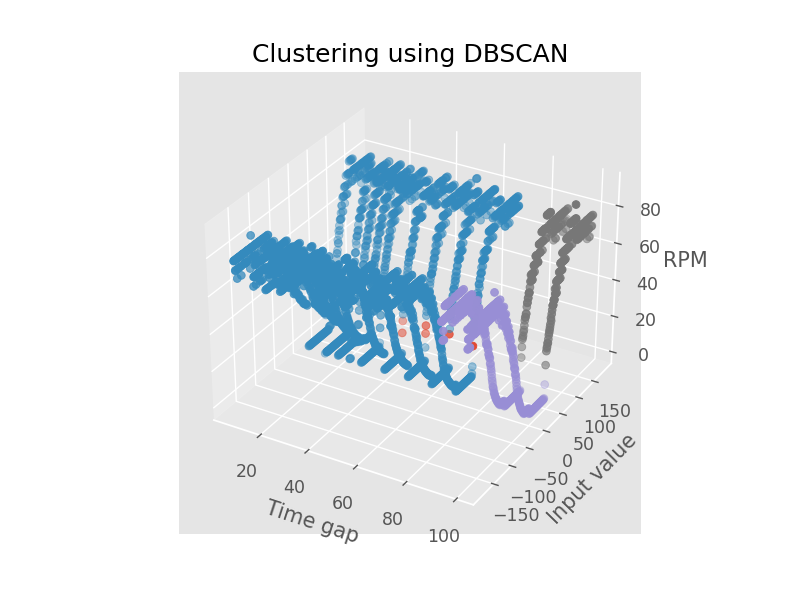

Text(0.5, 0.92, 'Clustering using DBSCAN')

In [228]:
model = DBSCAN(eps=10, min_samples=9)
y_pred = model.fit_predict(X)
clusters = np.unique(y_pred)

clusters = np.unique(y_pred)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Time gap')
ax.set_ylabel('Input value')
ax.set_zlabel('RPM')
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(y_pred == cluster)
    # create scatter of these samples
    ax.scatter(X.time_gap.iloc[row_ix], X.input_value.iloc[row_ix], X.rpm.iloc[row_ix])
    #plt.scatter( X['input_value'].iloc[row_ix],X['rpm'].iloc[row_ix])
# show the plot
plt.show()
#plt.xlabel('RPM')
#plt.ylabel('Input Value')
plt.title('Clustering using DBSCAN')

In [111]:
X['time']=[(X['time_gap'][len(X)-1])/(len(X)-1)*i for i in range(0,len(X))]
X['time']

0         0.000000
1         0.025094
2         0.050188
3         0.075282
4         0.100376
           ...    
3981     99.899624
3982     99.924718
3983     99.949812
3984     99.974906
3985    100.000000
Name: time, Length: 3986, dtype: float64

In [70]:
time_step=0.025094102885821833

In [45]:
df=X[['input_value','time']]

<IPython.core.display.Javascript object>


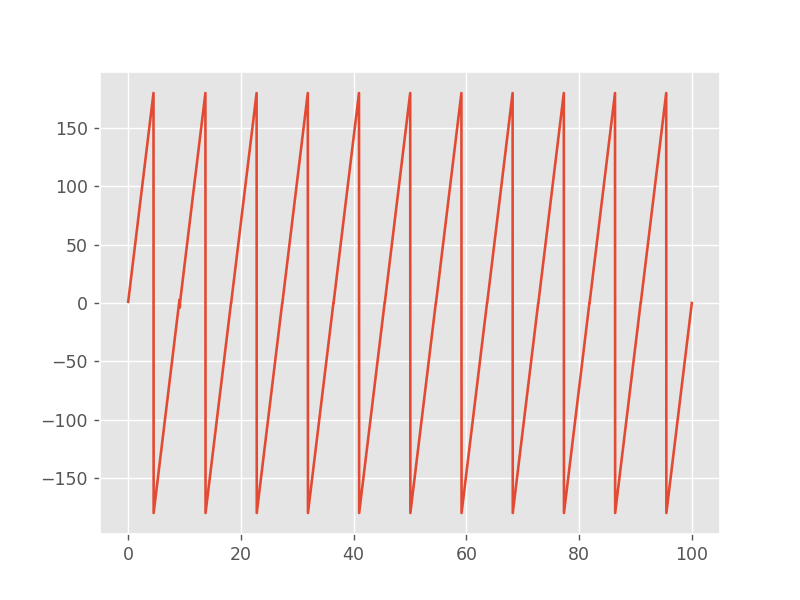

In [57]:
plt.plot(X['time'],X['input_value'])

In [66]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X[['time']],X['input_value'])
preds=rfr.predict(X[['time']])
from sklearn.metrics import mean_squared_error as mse
np.sqrt(mse(preds,X['input_value']))

5.866196721378229

In [91]:
X_fut=pd.DataFrame([i*time_step for i in range(len(X),len(X)+2000)],columns=['ds'])

In [108]:
df['y']

0       1
1       2
2       3
3       4
4       5
       ..
3981   -4
3982   -3
3983   -2
3984   -1
3985    0
Name: y, Length: 3986, dtype: int64

In [98]:
preds=m.predict(X_fut)['yhat']
plt.plot(X_fut,preds)

In [82]:
df.columns=['ds','y']

In [83]:
import pandas as pd
from prophet.plot import plot_components_plotly,plot_plotly
from fbprophet import Prophet
m=Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
